## Importing Libraries :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import seaborn as sns
sns.set(color_codes=True)
import cv2
import random
from scipy import ndimage
import warnings
warnings.filterwarnings("ignore")

## Question No 1 

##  Analog filters

## (a) Consider a RC circuit with input voltage Vi = 10*sin(2*pi*t) V
applied to the series RC and output Vo taken from the ends of C with R = 47kΩ and C = 47nF.

Find the transfer function of the circuit and plot the frequency and magnitude spectrum. Which kind of filter is this?

Prove your claim by putting in the frequency as 100Hz and 10000Hz

and finding the values of Vo. Find the cutoff frequency and verify that the behaviour is justified.


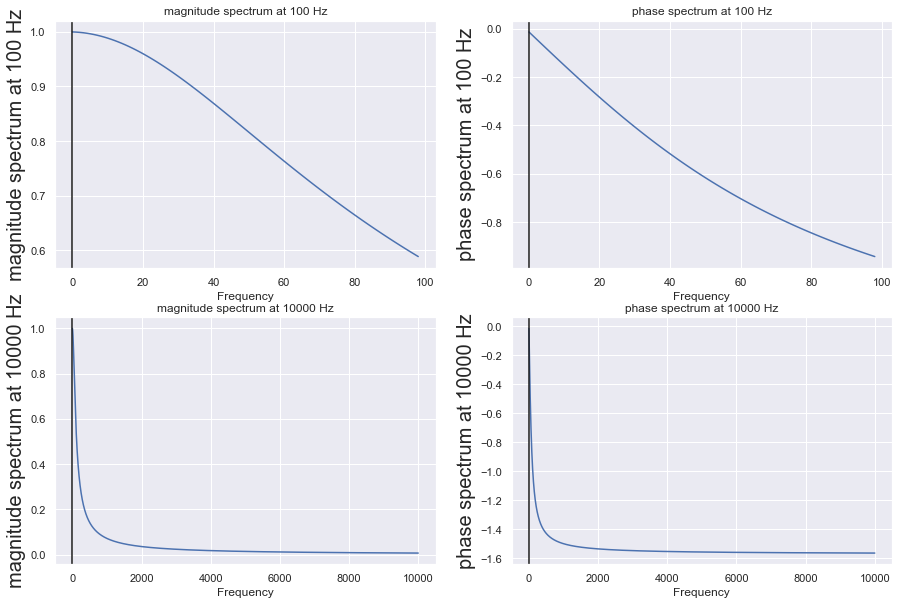

In [2]:
# RC-circuit
R = 47000  #ohm
C = 47*10**(-9)  #ferad
f = [100,10000] # frequency
t = [0.01 ,0.0001] # time as 1/frequency
freq = [np.arange(1,i,1) for i in f ]
Vi = [10*np.sin(2*np.pi*i) for i in t ] # input voltage 
w = [2*np.pi*freq[i] for i in range(len(freq))]# angular frequency

H = [1/(1+ 1j*w[i]*R*C) for i in range(len(w)) ] # transfer function
plot = [np.abs(H[0]),np.angle(H[0]),np.abs(H[1]),np.angle(H[1])]
name = ['magnitude spectrum at 100 Hz','phase spectrum at 100 Hz','magnitude spectrum at 10000 Hz','phase spectrum at 10000 Hz']    
fig, axs = plt.subplots(2,2, figsize=(15,10))
c =1
for k in range(len(plot)):
    fig.set_facecolor("white")
    plt.subplot(2,2,c)
    plt.plot(plot[k])
    plt.title(str(name[k]))
    plt.xlabel("Frequency")
    plt.ylabel(str(name[k]),fontsize=20)
    plt.axvline(x=0,color='k')
    c =c+1 

#### By seeing magnitude spectrum we conclude that this filter behave as a Low Pass Filter when we take output voltage from the capacitor .

In [3]:
fc = print("cut off frequency is :",1/(2*np.pi*R*C))
Xc = [1/(2*np.pi*f[i]*C) for i in range(len(f)) ] # capacitance reactance
Z = [(R**2 +Xc[i]**2)**0.5 for i in range(len(f)) ] # impedence
Vo = [ print("output voltage at frequency "+str(f[i])+" Hz is : "+str((Vi[i]*Xc[i])/Z[i])) for i in range(len(f)) ]  # output voltage 


cut off frequency is : 72.04841244540305
output voltage at frequency 100 Hz is : 0.3670503865407351
output voltage at frequency 10000 Hz is : 4.52681747553692e-05


## (b) Consider the same circuit mentioned before, but now the output voltage is taken across the resistor.
Does this change the behaviour of the transfer function?

Find the transfer function of the circuit and plot the frequency and magnitude spectrum.Which kind of filter is this? 

Prove your claim by putting in the frequency as 100Hz and 10000Hz 

and finding the values of Vo. Find the cutoff frequency and verify that the behaviour is justified.


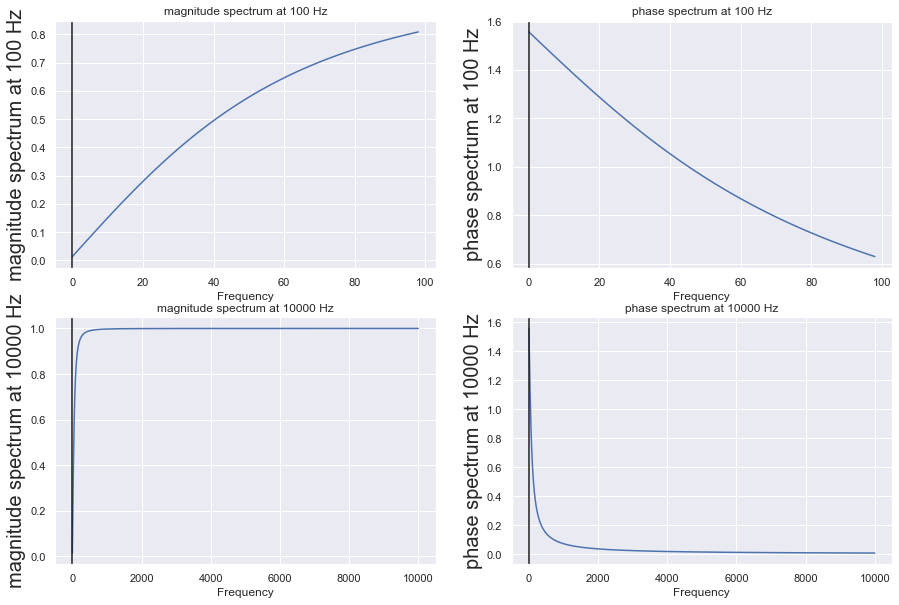

In [4]:
# Output Volatge across R
H2 = [1j*w[i]*R*C/(1+ 1j*w[i]*R*C) for i in range(len(w)) ]  # transfer function 
#Vo=V*R/Z
plot = [np.abs(H2[0]),np.angle(H2[0]),np.abs(H2[1]),np.angle(H2[1])]
name = ['magnitude spectrum at 100 Hz','phase spectrum at 100 Hz','magnitude spectrum at 10000 Hz','phase spectrum at 10000 Hz']     
fig, axs = plt.subplots(2,2, figsize=(15,10))
c =1
for k in range(len(plot)):
    fig.set_facecolor("white")
    plt.subplot(2,2,c)
    plt.plot(plot[k])
    plt.title(str(name[k]))
    plt.xlabel("Frequency")
    plt.ylabel(str(name[k]),fontsize=20)
    plt.axvline(x=0,color='k')
    c =c+1 

#### By seeing magnitude spectrum we can say that this filter now behave as a High Pass Filter when we take output from resistor.

In [5]:
fc = print("cut off frequency is :",1/(2*np.pi*R*C))
Xc = [1/(2*np.pi*f[i]*C) for i in range(len(f)) ] # capacitance reactance
Z = [(R**2 +Xc[i]**2)**0.5 for i in range(len(f)) ] # impedence
Vo = [ print("output voltage at frequency "+str(f[i])+" Hz is : "+str((Vi[i]*R)/Z[i])) for i in range(len(f)) ]  # output voltage 


cut off frequency is : 72.04841244540305
output voltage at frequency 100 Hz is : 0.5094496520917502
output voltage at frequency 10000 Hz is : 0.006283021820872541


## (c) Design a second order low pass filter using RC circuit.
Do the analysis for R = 50KΩ and C = 50nF. The input voltage waveform is 10 sin 2πt.

Plot the amplitude and frequency spectrum.


cut off frequency is : 63.66197723675813


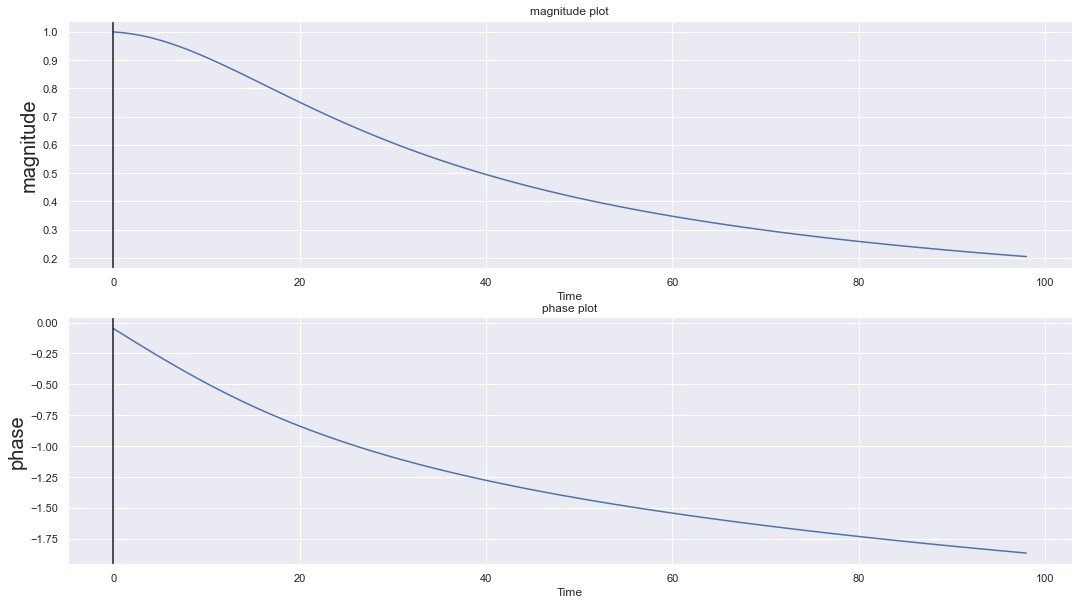

In [6]:
R = 50000 # ohm
C = 50*10**(-9) # farad
freq = np.arange(1,100,1)
w = 2*np.pi*freq

H3 = 1/(1+3j*w*C*R+((1j*w)**2)*(C**2)*(R**2)) # transfer function

plot = [np.abs(H3),np.angle(H3)]
name = ['magnitude','phase']    
fig, axs = plt.subplots(2,1, figsize=(18,10))
c =1
for k in range(len(plot)):
    fig.set_facecolor("white")
    plt.subplot(2,1,c)
    plt.plot(plot[k])
    plt.title(str(name[k])+" plot")
    plt.xlabel("Time")
    plt.ylabel(str(name[k]),fontsize=20)
    plt.axvline(x=0,color='k')
    c =c+1 
    
fc = print("cut off frequency is :",1/(2*np.pi*R*C))

## (d) Design a band pass filter using cascaded RC circuits.
Make use of the values of the 2 resistors as 20KΩ. 

The filter should pass all the frequencies between 1kHz and 30kHz. 

Find the transfer function of the same and plot the magnitude and amplitude of the filter.

capictor value in farad is c1 :7.957747154594767e-09 and c2 :2.6525823848649227e-10
low cut off frequency is :  1000.0
high cut off frequency is :  30000.0
bandwidth is :  29000.0


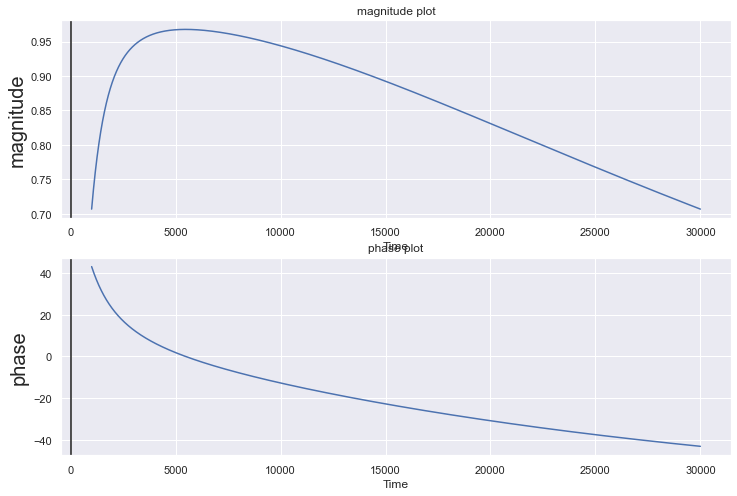

In [7]:
R = 20000  #ohm 
f1 = 1000  #Hz
f2 = 30000 #Hz
c1 = 1/(2*np.pi*R*f1)
c2 = 1/(2*np.pi*R*f2)

freq = np.arange(f1,f2,1)
w = 2*np.pi*freq

H4 = ((1j*w*R*c1)/((1j*w*R*c1)+1))*(1/((1j*w*R*c2)+1))   # Transfer function

plot = [np.abs(H4),np.angle(H4,deg=True)]
name = ['magnitude','phase']    
fig, axs = plt.subplots(2,1, figsize=(12,8))
c =1
for k in range(len(plot)):
    fig.set_facecolor("white")
    plt.subplot(2,1,c)
    plt.plot(freq,plot[k])
    plt.title(str(name[k])+" plot")
    plt.xlabel("Time")
    plt.ylabel(str(name[k]),fontsize=20)
    plt.axvline(x=0,color='k')
    c =c+1 

f_low = 1/(2*np.pi*R*c1)
f_high = 1/(2*np.pi*R*c2)
BW = f_high - f_low
print("capictor value in farad is c1 :"+str(c1)+" and c2 :"+str(c2))
print("low cut off frequency is : ",f_low)
print("high cut off frequency is : ",f_high)
print("bandwidth is : ",BW)

## Question No 2

##  Digital filters

## (a) Consider the difference equation: y[n] = x[n] + x[n − 1] .Take the sampling rate to be 1 Hz.
Find the output of the system to the sequence: x[n] = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

What kind of filter is this? Compute the transfer function to plot.

the frequency and amplitude plots to verify your claim.

Consider the sinusoidal input to the filter with unit amplitude. Find and plot the filter output.

In [8]:
x = [1,2,3,4,5,6,7,8,9,10]
x1 = x[::-1]
x.append(0)
x1.append(0)
x_new = x1[::-1]
x = np.asarray(x)
x_new = np.asarray(x_new)
y = x + x_new
print(f'The output of the filter is y = {y}')

The output of the filter is y = [ 1  3  5  7  9 11 13 15 17 19 10]


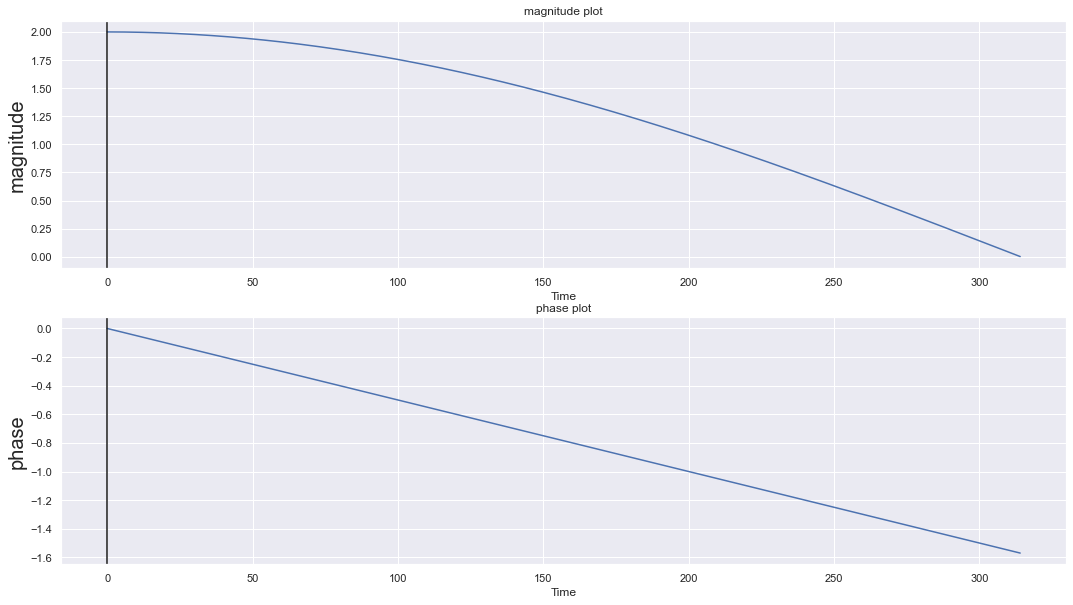

In [9]:
#Transfer function 
n = np.arange(0,20,1)
w = np.arange(0,np.pi,0.01)
H = 1+np.exp(-1j*w) #Transfer function

plot = [np.abs(H),np.angle(H)]
name = ['magnitude','phase']    
fig, axs = plt.subplots(2,1, figsize=(18,10))
c =1
for k in range(len(plot)):
    fig.set_facecolor("white")
    plt.subplot(2,1,c)
    plt.plot(plot[k])
    plt.title(str(name[k])+" plot")
    plt.xlabel("Time")
    plt.ylabel(str(name[k]),fontsize=20)
    plt.axvline(x=0,color='k')
    c =c+1 

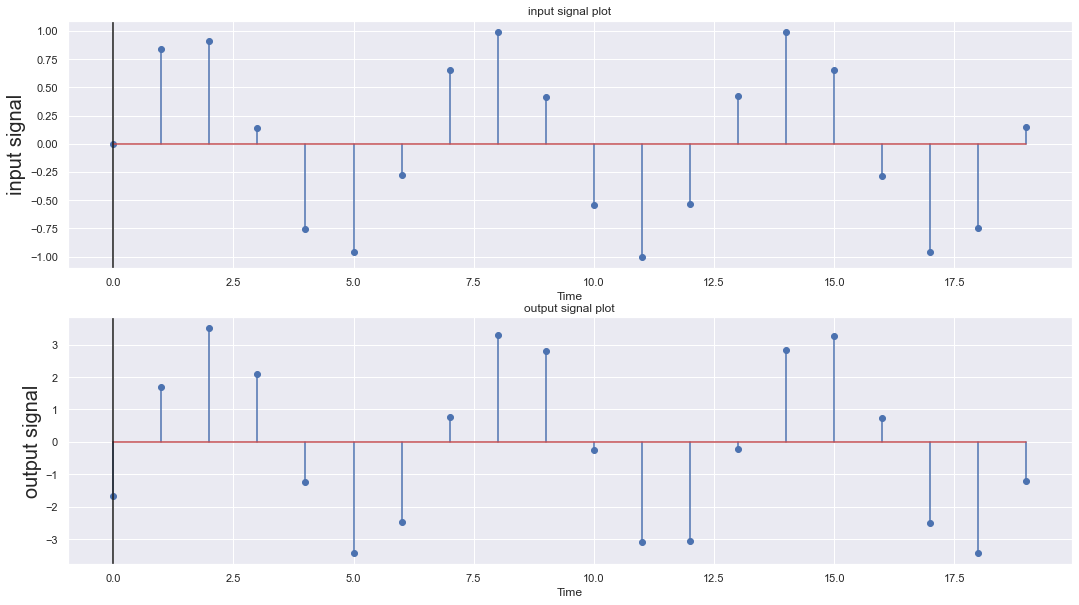

In [10]:
X = np.sin(n)
gain = 2*abs(1+np.exp(-1j))
phase = np.arctan(np.sin(1)/(1+np.cos(1))) - 1
Y = gain*np.sin(n + phase)

plot = [X,Y]
name = ["input signal","output signal"]    
fig, axs = plt.subplots(2,1, figsize=(18,10))
c =1
for k in range(len(plot)):
    fig.set_facecolor("white")
    plt.subplot(2,1,c)
    plt.stem(plot[k])
    plt.title(str(name[k])+" plot")
    plt.xlabel("Time")
    plt.ylabel(str(name[k]),fontsize=20)
    plt.axvline(x=0,color='k')
    c =c+1 

## (b) The difference equation: y[n] = 1/3*(x[n] + x[n − 1] +  x[n−2]) 
What is this filter called?
Compute the transfer function to plot the frequency and amplitude spectrum. What are the applications of this
filter?

Improve the above filter by the differential equation:

y[n] = 1/4*x[n] + 1/2*x[n − 1] + 1/4*x[n − 2] 

and again do the whole analysis.


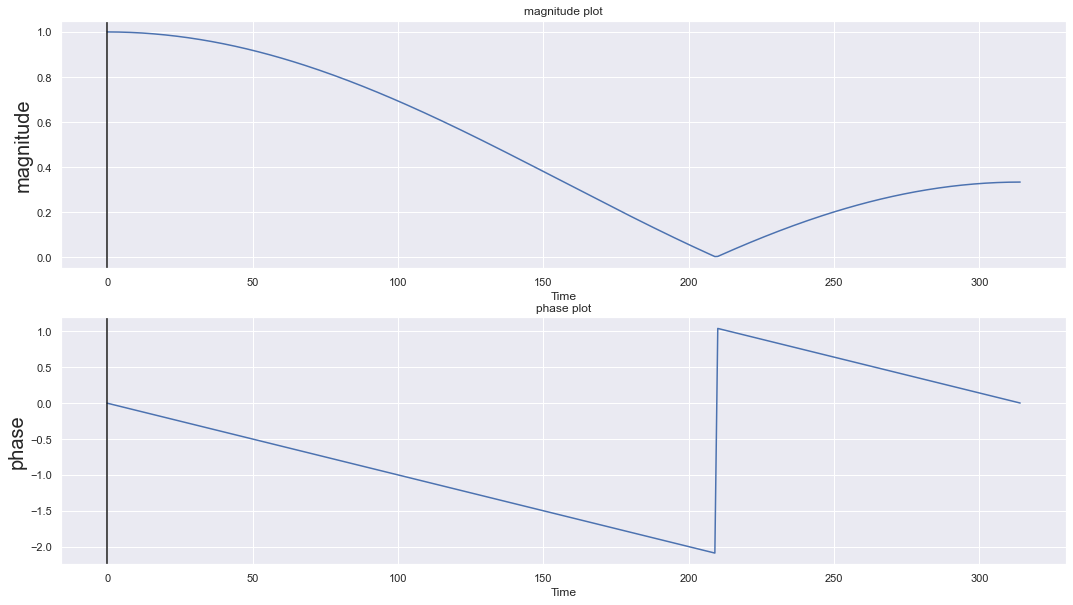

In [11]:
#Transfer function 
omega = np.arange(0,np.pi,0.01)
H = (1/3)*(1+np.exp(-1j*omega) + np.exp(-1j*2*omega))

plot = [np.abs(H),np.angle(H)]
name = ['magnitude','phase']    
fig, axs = plt.subplots(2,1, figsize=(18,10))
c =1
for k in range(len(plot)):
    fig.set_facecolor("white")
    plt.subplot(2,1,c)
    plt.plot(plot[k])
    plt.title(str(name[k])+" plot")
    plt.xlabel("Time")
    plt.ylabel(str(name[k]),fontsize=20)
    plt.axvline(x=0,color='k')
    c =c+1 

## Improve the above filter by the differential equation:

y[n] = 1/4*x[n] + 1/2*x[n − 1] + 1/4*x[n − 2] and again do the whole analysis.


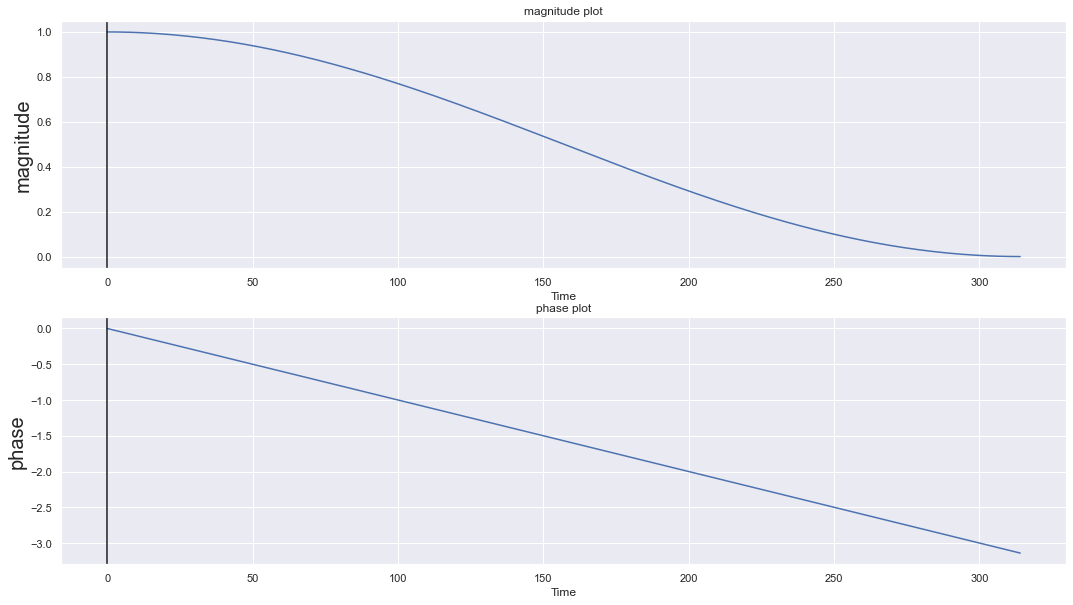

In [12]:
#Transfer function 
omega = np.arange(0,np.pi,0.01)
H7 = (1/4) + (1/2)*np.exp(-1j*omega) +(1/4)*np.exp(-2j*omega)

plot = [np.abs(H7),np.angle(H7)]
name = ['magnitude','phase']    
fig, axs = plt.subplots(2,1, figsize=(18,10))
c =1
for k in range(len(plot)):
    fig.set_facecolor("white")
    plt.subplot(2,1,c)
    plt.plot(plot[k])
    plt.title(str(name[k])+" plot")
    plt.xlabel("Time")
    plt.ylabel(str(name[k]),fontsize=20)
    plt.axvline(x=0,color='k')
    c =c+1 

## (c) Take any digital image of your choice and apply mean and median filtering. 
What are the differences between the two?

Take an image and add speckle noise to it. 

Use a particular filter to remove this noise.

Take another image and add salt and pepper noise and again use a particular filter to remove the noise.

Plot the original images, noisy images and images after noise removal respectively.

Number of Pixels in image 0 is : 278784
Shape/Dimensions of image 0 is : (264, 352, 3)
Number of Pixels in image 1 is : 168846
Shape/Dimensions of image 1 is : (214, 263, 3)


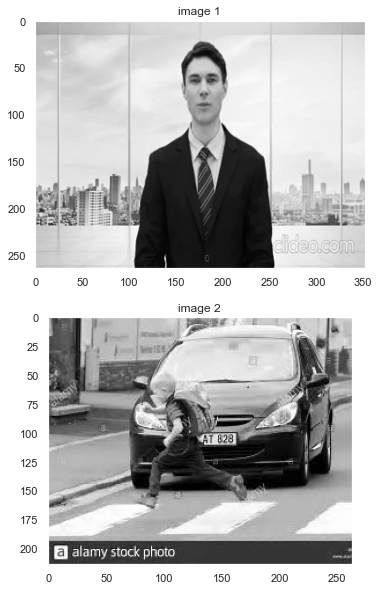

In [13]:
#read image 
img = cv2.imread('image.png',0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('download.jpg',0)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

image = [img,img2]
name =["image 1","image 2"]
fig, axs = plt.subplots(2,1, figsize=(18,10))
c =1
for i in range(len(image)):
    plt.subplot(2,1,c)
    fig.set_facecolor("white")
    plt.imshow(image[i].astype('uint8'))
    print("Number of Pixels in image "+str(i)+" is : " + str(image[i].size))
    print("Shape/Dimensions of image "+str(i)+" is : " + str(image[i].shape))
    plt.title(str(name[i]))
    plt.grid()
    c = c +1

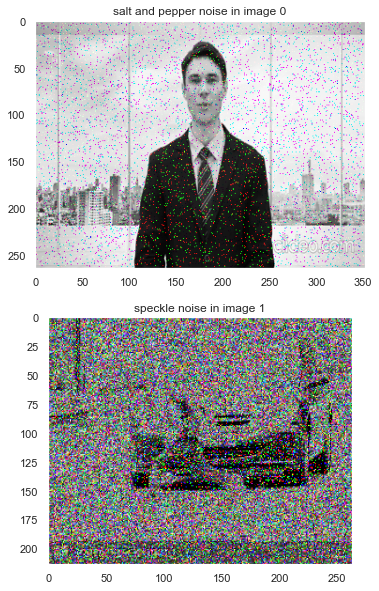

In [14]:
def noisy(noise_type,image):
    row,col,channel= image.shape
    if noise_type == "salt and pepper":
        s_vs_p = 0.5
        amount = 0.04 # noise added probability 
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        salt = [np.random.randint(0, i-1, int(num_salt)) for i in image.shape]
        out[salt] = 255 # intensity level for sal noise as white 
        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        pepper = [np.random.randint(0, i-1, int(num_pepper)) for i in image.shape]
        out[pepper] = 0  # intensity level for paper noise as dark 
        return out
    elif noise_type =="speckle":
        gauss = np.random.randn(row,col,channel)
        gauss = gauss.reshape(row,col,channel)        
        noisy = image + image * gauss
        return noisy
a = [noisy("salt and pepper",img) ,noisy("speckle",img2)]
name =["salt and pepper","speckle"]
#show image
fig, axs = plt.subplots(2,1, figsize=(18,10))
c =1
for i in range(len(a)):
    plt.subplot(2,1,c)
    fig.set_facecolor("white")
    plt.imshow(a[i].astype('uint8'))
    plt.title(str(name[i])+" noise in image "+str(i))
    plt.grid()
    c = c +1

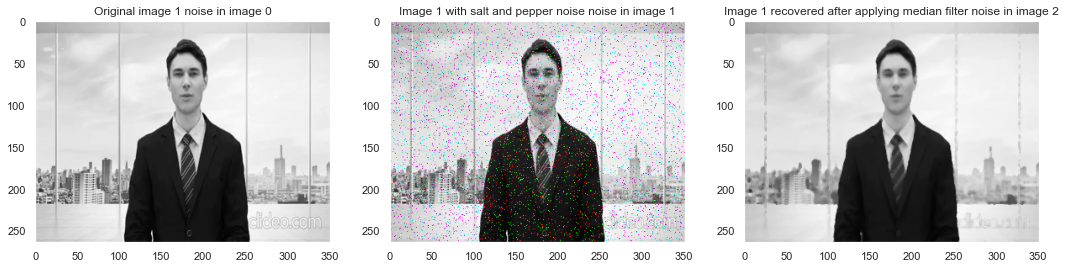

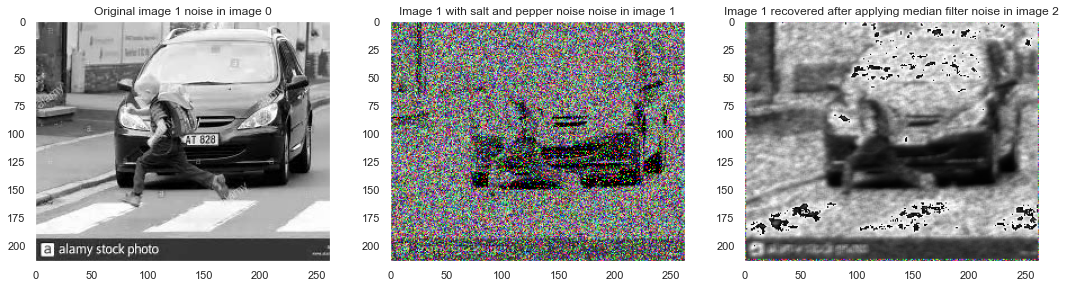

In [15]:
# Function to apply median filter(window size kxk) on the input image  
def median_filter(img_in, window_size = 5):
    result = np.copy(img_in)
    rows, cols,dim = img_in.shape
    radius = int((window_size-1)/2)
    for i in range(0, rows):
        for j in range(0, cols):
             result[i,j] = np.median(img_in[max(i - radius,0): min(i + radius,rows), max(j - radius,0) : min(cols,j+ radius)])
    return result

def mean(img,wind):
    img = img.astype(float)/255
    M,N,w = img.shape
    filt_img = img
    for i in range(wind//2,M-(wind//2)):
        for j in range(wind//2,N-(wind//2)):
            a = img[i-(wind//2):i+1+(wind//2),j-(wind//2):j+1+(wind//2)]
            mean = np.mean(a)
            filt_img[i,j] = mean
    filt_img = filt_img*255
    filt_img = filt_img.astype('uint8')
    return filt_img

result1 = median_filter(a[0], window_size = 5)
result2 = mean(a[1],5)

# Plot results
out1 = [img ,a[0],result1]
name = ["Original image 1","Image 1 with salt and pepper noise","Image 1 recovered after applying median filter"]
#show image
fig, axs = plt.subplots(1,3, figsize=(18,10))
c =1
for i in range(len(out1)):
    plt.subplot(1,3,c)
    fig.set_facecolor("white")
    plt.imshow(out1[i].astype('uint8'))
    plt.title(str(name[i])+" noise in image "+str(i))
    plt.grid()
    c = c +1
    
out2 = [img2 ,a[1],result2]
name = ["Original image 1","Image 1 with salt and pepper noise","Image 1 recovered after applying median filter"]
#show image
fig, axs = plt.subplots(1,3, figsize=(18,10))
c =1
for i in range(len(out2)):
    plt.subplot(1,3,c)
    fig.set_facecolor("white")
    plt.imshow(out2[i].astype('uint8'))
    plt.title(str(name[i])+" noise in image "+str(i))
    plt.grid()
    c = c +1

## (d) Can we convert an analog filter into a digital filter altogether?
What is the way to do it? 

Use the technique to convert all the analog filters into digital filters and plot the amplitude and frequency plots.

######   we can convert analog to digital filter using the bilinear transformation

In [16]:
R = 47000
C = 47*(10**-9)
f1 = 1 *(10**3)
f2 = 30 *(10**3)
c1 = 1/(2*np.pi*R*f1)
c2 = 1/(2*np.pi*R*f2)
f = np.arange(0,10000,0.1)
omega = np.arange(0,np.pi,0.1)
T = 1
s = (2/T)*((np.exp(1j*omega) - 1)/(np.exp(1j*omega) + 1)) # s=(2/T)((z-1)/(z+1))

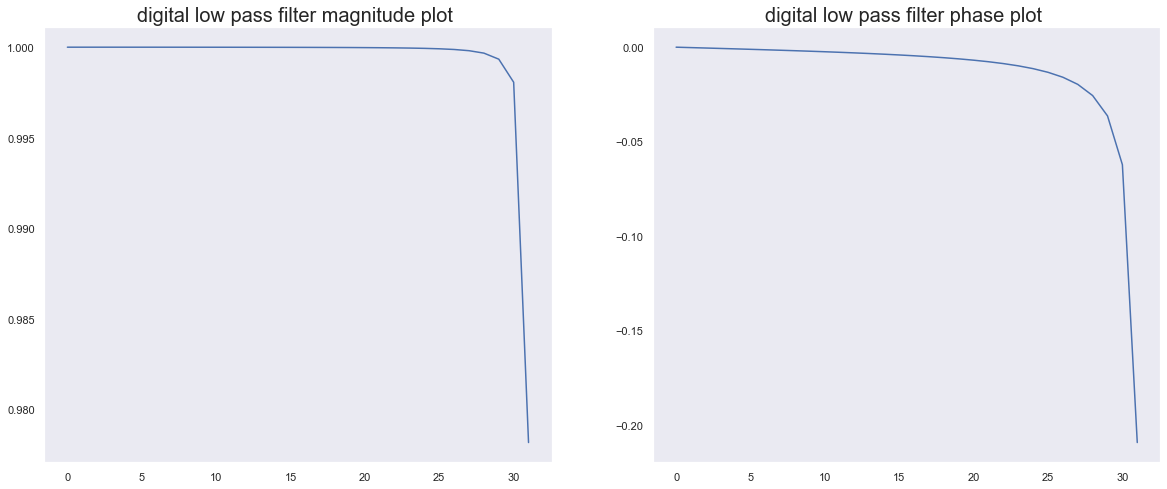

In [17]:
LPF_analog=1/(1+ 1j*2*np.pi*f*R*C) 
LPF_digital = H=1/(1+ s*R*C) 
LPF = [ np.abs(LPF_digital),np.angle(LPF_digital)]
name = ["magnitude","phase"]
#show image
fig, axs = plt.subplots(1,2, figsize=(20,8))
c =1
for i in range(len(LPF)):
    plt.subplot(1,2,c)
    fig.set_facecolor("white")
    plt.plot(LPF[i])
    plt.title("digital low pass filter "+str(name[i])+" plot ",fontsize=20)
    plt.grid()
    c = c +1

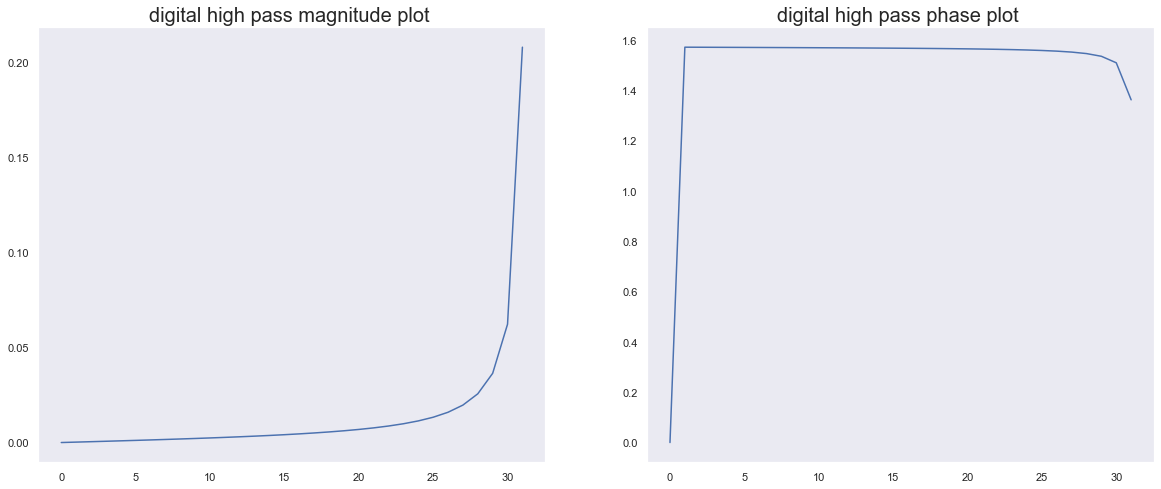

In [18]:
HPF_analog = 2j*np.pi*f*R*C/(1+ 1j*2*np.pi*f*R*C) 
HPF_digital =s*R*C/(1+ s*R*C) 
HPF = [ np.abs(HPF_digital),np.angle(HPF_digital)]
name = ["magnitude","phase"]
#show image
fig, axs = plt.subplots(1,2, figsize=(20,8))
c =1
for i in range(len(HPF)):
    plt.subplot(1,2,c)
    fig.set_facecolor("white")
    plt.plot(HPF[i])
    plt.title("digital high pass "+str(name[i])+" plot ",fontsize=20)
    plt.grid()
    c = c +1

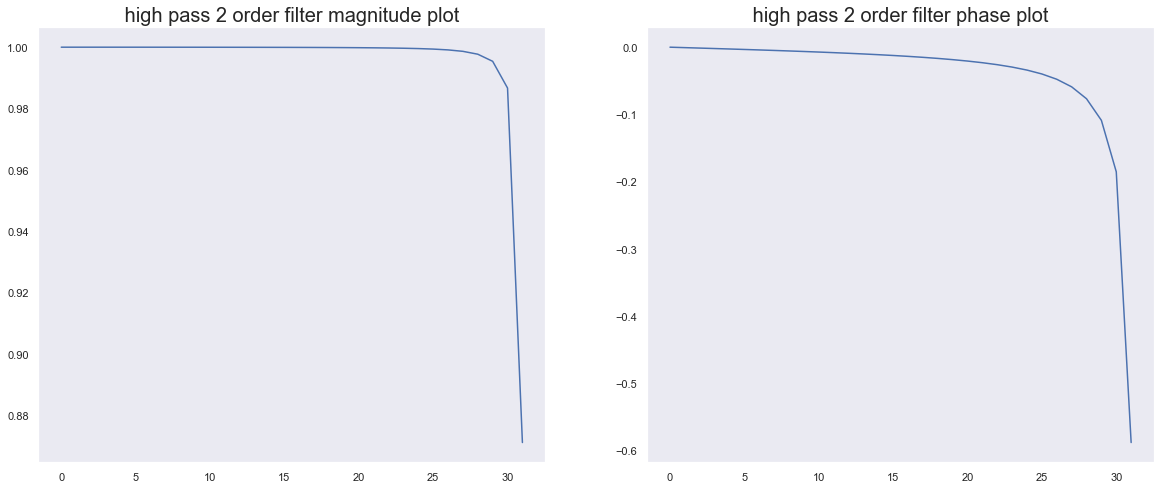

In [19]:
HPF2_analog = 1/(1+3j*2*np.pi*f*C*R + ((1j*2*np.pi*f)**2)*(C**2)*(R**2))
HPF2_digital = 1/(1+3*s*C*R + ((s)**2)*(C**2)*(R**2))
HPF2 = [ np.abs(HPF2_digital),np.angle(HPF2_digital)]
name = ["magnitude","phase"]
#show image
fig, axs = plt.subplots(1,2, figsize=(20,8))
c =1
for i in range(len(HPF2)):
    plt.subplot(1,2,c)
    fig.set_facecolor("white")
    plt.plot(HPF2[i])
    plt.title(" high pass 2 order filter "+str(name[i])+" plot ",fontsize=20)
    plt.grid()
    c = c +1

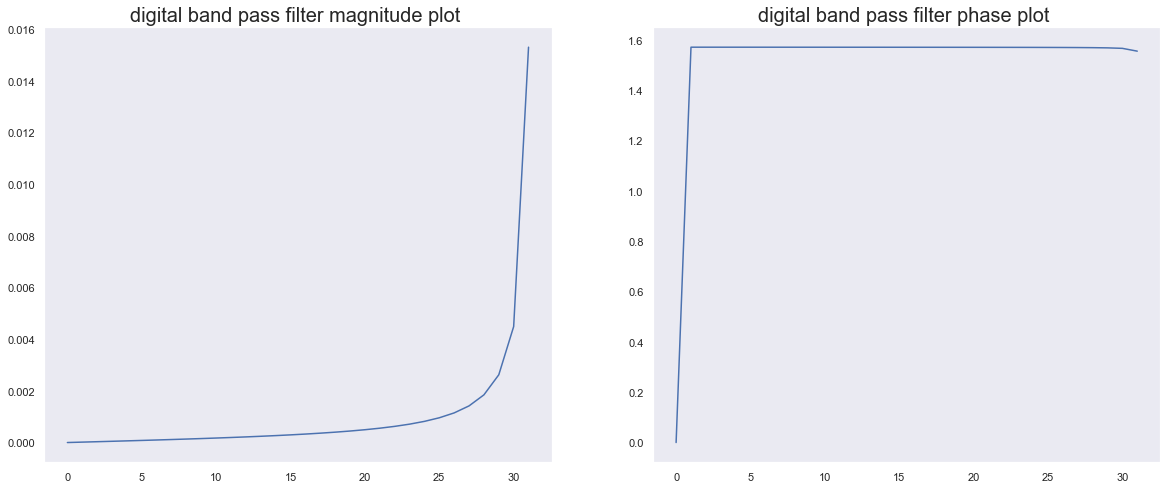

In [21]:
BPF_analog = ((1j*2*np.pi*f*R*c1))/((1+1j*2*np.pi*f*R*c1)*(1+1j*2*np.pi*f*R*c2))
BPF_digital = ((s*R*c1))/((1+s*R*c1)*(1+s*R*c2))
BPF = [ np.abs(BPF_digital),np.angle(BPF_digital)]
name = ["magnitude","phase"]
#show image
fig, axs = plt.subplots(1,2, figsize=(20,8))
c =1
for i in range(len(BPF)):
    plt.subplot(1,2,c)
    fig.set_facecolor("white")
    plt.plot(BPF[i])
    plt.title("digital band pass filter "+str(name[i])+" plot ",fontsize=20)
    plt.grid()
    c = c +1